# 线性回归预测

## (1)梯度下降算法

In [1]:
# 导入依赖包
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']

In [168]:
def gradient_descent(x, y, learning_rate=0.01, num_iterations=10000):
    n_samples, n_features = x.shape
    theta = np.zeros(n_features+1)  # 初始化参数向量（包括截距项）
    x = np.column_stack((np.ones(n_samples), x))
    loss_record = []  # 记录损失函数值的变化
    gradient_norm_record = []  # 记录梯度的模的变化

    for i in range(num_iterations):
        y_fit = np.dot(x, theta) # 计算拟合值
        gradient = np.dot(x.T, (pd.DataFrame(y_fit)-y))/n_samples  # 计算梯度
        theta = theta-learning_rate*gradient  # 更新参数
        loss = np.mean((y_fit-y)**2)  # 计算loss function值
        loss_record.append(loss)  # 记录loss function值
        gradient_norm_record.append(np.linalg.norm(gradient))  # 计算并记录梯度模
    theta = theta[:, 0]
    
    y_fit = pd.DataFrame(y_fit[:, 0]).values
    
    R_square = (np.sum(np.square(y-np.mean(y)))-np.sum(np.square(y-y_fit)))/np.sum(np.square(y-np.mean(y)))
    F = (np.sum(np.square(y-np.mean(y)))-np.sum(np.square(y-y_fit)))/np.sum(np.square(y-y_fit))*(n_samples-n_features-1)/(n_features)
    return theta, R_square, F, loss_record, gradient_norm_record

In [3]:
def draw(num_iterations, loss_record, gradient_norm_record):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_iterations), loss_record)
    plt.xlabel('迭代次数')
    plt.ylabel('损失函数值')
    plt.title('损失函数变化')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(num_iterations), gradient_norm_record)
    plt.xlabel('迭代次数')
    plt.ylabel('梯度模')
    plt.title('梯度模变化')
    
    plt.tight_layout()
    plt.show()

## (2)蒙特卡洛方法计算p值

In [206]:
from scipy import stats
import statsmodels.api as sm
import seaborn as sns


def calculate_p_value(x, y, actual_F, n_simulations=1000):
    n_samples, n_features = x.shape
    simulated_slopes = []
    
    for i in range(n_simulations):
        random_X = np.random.rand(n_samples, n_features)
        random_y = pd.DataFrame(np.random.rand(n_samples)).values
        
        # 拟合
        theta, R_suqare, F, loss_record, gradient_norm_record = gradient_descent(random_X, random_y, 0.0001, 1000)
        simulated_slopes.append(F)
                                                                                                                                       
        p_value = np.mean(np.array(simulated_slopes) >= actual_F)
    return p_value
        

## (3)使用梯度下降算法尝试多元线性回归

数据集来源：“Data for Admission in the University” on Kaggle

### step1.数据探索

In [5]:
data = pd.read_csv('D:\\BaiduSyncdisk\\机器学习\\shangji\\data\\adm_data.csv')

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


可以看出，数据集中均无缺失值，故无需进行缺失值处理。
各变量的含义如下：
* Serial No.：序号
* GRE Score：GRE分数
* TOFEL Score：托福分数
* University Rating：大学评级
* SOP：Statement of Purpose Strength
* LOR：Letter of Recommendation Strength
* CGPA：Undergraduate GPA
* Research：Research Experience
* Chance of Admit：录取几率

<Axes: >

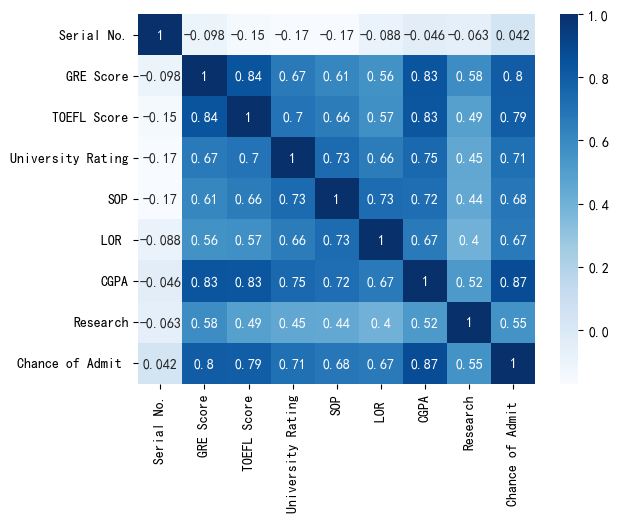

In [8]:
# 相关度热图
import seaborn as sns
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')

可以发现，Chance of Admit与其他特征均有较强相关性，因此可使用**多元线性回归**

### step2.多元线性回归

In [9]:
# 划分x与y
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
y=y.reshape(-1,1)

In [10]:
# 划分训练集与测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
# 标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

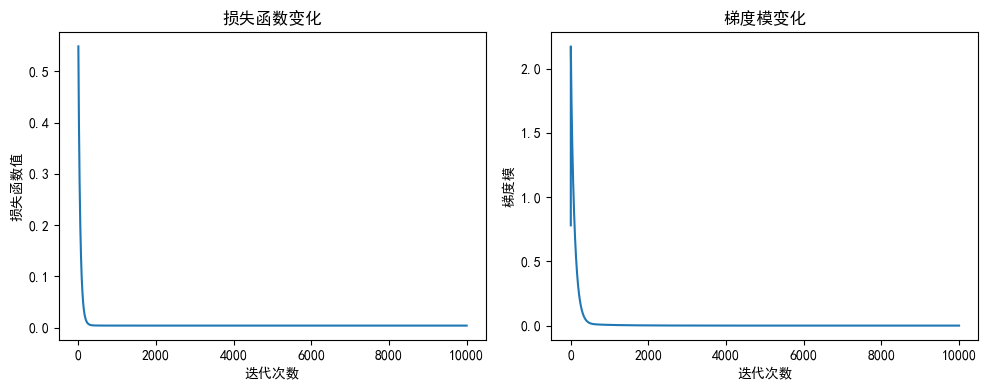

In [178]:
# 进行多元线性回归
theta, R_square, F, lr, gr = gradient_descent(x_train, y_train, 0.01, 10000)
draw(10000, lr, gr)

[ 0.72620053  0.028499    0.01783982  0.00730032 -0.0041428   0.02046343
  0.06687718  0.01000887]


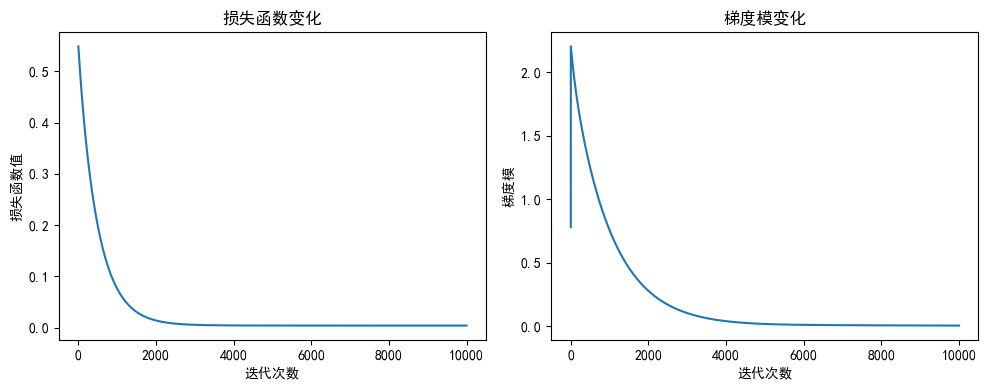

In [13]:
# 进行多元线性回归
theta, R_square, F, lr, gr = gradient_descent(x_train, y_train, 0.001, 10000)
draw(10000, lr, gr)

[0.45908038 0.02742819 0.02426126 0.01815018 0.01363772 0.01850743
 0.03297995 0.01445164]


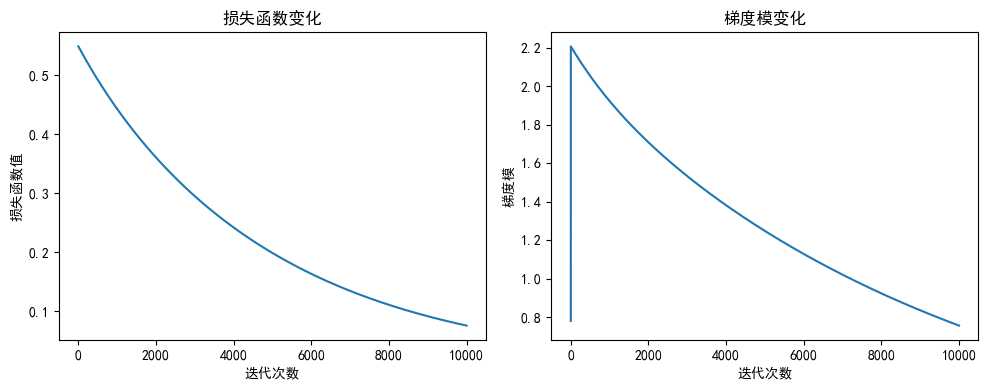

In [14]:
# 进行多元线性回归
theta, R_square, F, lr, gr = gradient_descent(x_train, y_train, 0.0001, 10000)
draw(10000, lr, gr)

[ 0.72623333  0.02266006  0.01431135  0.0056302  -0.00601818  0.01937341
  0.07957232  0.01062926]


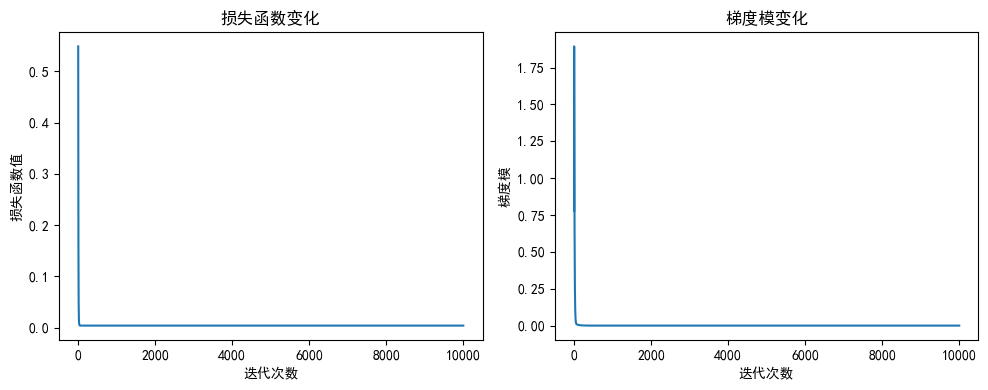

In [15]:
# 进行多元线性回归
theta, R_square, F, lr, gr = gradient_descent(x_train, y_train, 0.1, 10000)
draw(10000, lr, gr)

D:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Tavin\AppData\Local\Temp\ipykernel_3064\2129681325.py:12: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_fit-y)**2)  # 计算loss function值


[nan nan nan nan nan nan nan nan]


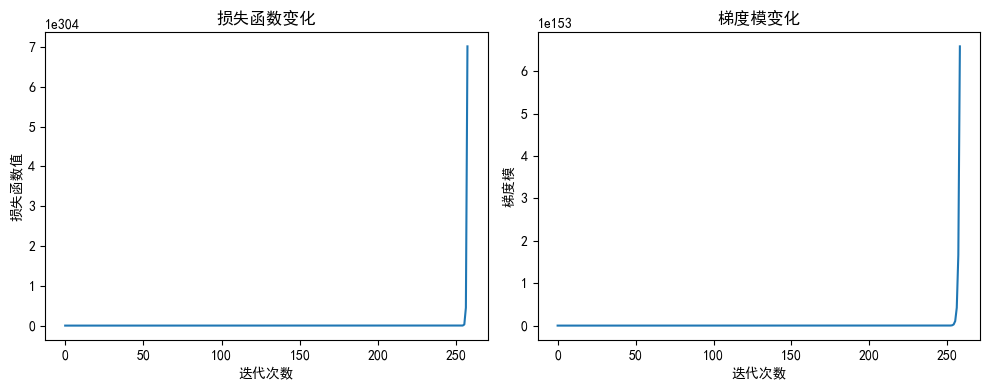

In [16]:
# 进行多元线性回归
theta, R_square, F, lr, gr = gradient_descent(x_train, y_train, 1, 10000)
draw(10000, lr, gr)

In [17]:
# 使用sklearn库进行多元线性回归
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
model.coef_

array([[ 0.02266006,  0.01431135,  0.0056302 , -0.00601818,  0.01937341,
         0.07957232,  0.01062926]])

In [19]:
model.intercept_

array([0.72623333])

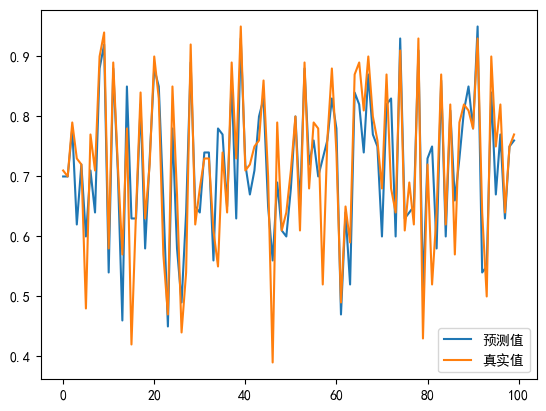

In [20]:
# 观察测试集的拟合程度
y_pred = np.round(model.predict(x_test),2)
x = range(len(y_pred))
plt.figure()
plt.plot(x, y_pred, label='预测值')
plt.plot(x, y_test, label='真实值')
plt.legend()
plt.show()

可以看出，预测值与真实值拟合度较高，具有良好的预测效果

## (4)Adam算法

In [183]:
def Adam(x, y, learning_rate=0.01, num_iterations=10000, momentum=0.9, decay=0.9):
    n_samples, n_features = x.shape
    theta = np.zeros(n_features+1)  # 初始化参数向量（包括截距项）
    x = np.column_stack((np.ones(n_samples), x))
    loss_record = []  # 记录损失函数值的变化
    gradient_norm_record = []  # 记录梯度的模的变化
    velocity = np.zeros_like(theta)
    rmsprop_cache = np.zeros_like(theta)
    
    for i in range(num_iterations):
        y_fit = np.dot(x, theta)  # 计算拟合值
        gradient = np.dot(x.T, (pd.DataFrame(y_fit)-y))/n_samples  # 计算梯度
        
        # 使用动量
        velocity = momentum * velocity + learning_rate * gradient

        
        # 使用RMSProp更新参数
        rmsprop_cache = decay * rmsprop_cache + (1 - decay) * gradient**2
        theta = theta - learning_rate / np.sqrt(rmsprop_cache) * velocity
        
        loss = np.mean((y_fit-y)**2)  # 计算loss function值
        loss_record.append(loss)  # 记录loss function值
        gradient_norm_record.append(np.linalg.norm(gradient))  # 计算并记录梯度模
    theta = theta[:,0]
    print(theta)
    
    y_pre = pd.DataFrame(np.dot(x, theta))
    F = (np.sum((y-np.mean(y))**2)-np.sum((y-y_pre)**2))/(np.sum((y-y_pre)**2)*
                                                         (n_samples-n_features)/(n_features-1))
    return theta, F, loss_record, gradient_norm_record

[ 0.72621375  0.02261761  0.01426891  0.00558776 -0.00606063  0.01933097
  0.07952987  0.01058682]


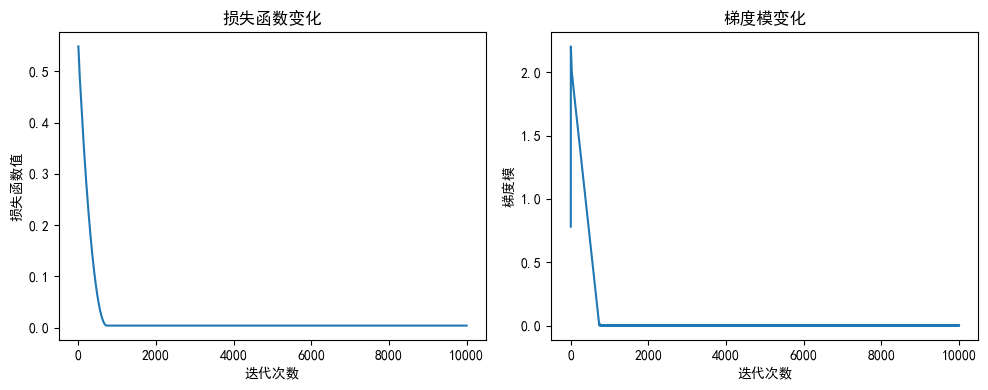

In [22]:
theta, F, lr, gr = Adam(x_train, y_train, 0.01, 10000, 0.9)
draw(10000, lr, gr)

In [207]:
theta,R_square, F, lr, gr = gradient_descent(x_train, y_train, 0.01, 10000)
p = calculate_p_value(x_train, y_train, F, 10)
print("R_square=",R_square)
print("F=",F)
print("p_value=",p)

R_square= 0.8238709738862324
F= 195.12507367296868
p_value= 0.0


下面调包计算p值

In [98]:
import statsmodels.api as sm

sm_model = sm.OLS(y_train, np.column_stack((np.ones(x_train.shape[0]), x_train)))
results = sm_model.fit()
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     195.1
Date:                Sat, 23 Dec 2023   Prob (F-statistic):          3.84e-106
Time:                        20:20:19   Log-Likelihood:                 412.74
No. Observations:                 300   AIC:                            -809.5
Df Residuals:                     292   BIC:                            -779.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7262      0.004    203.004      0.0

比较p值，与自己编写的代码计算结果相同，p=0，现在这种情况是碰运气碰到的概率接近为0